# Hierarchical and Density-based clustering: Comparing Different Clustering algorithms

In [1]:
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr

import sklearn.cluster as cluster

from sklearn.decomposition import TruncatedSVD

from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### Generating the data using again blobs

(90, 2) (90,) <type 'numpy.ndarray'>


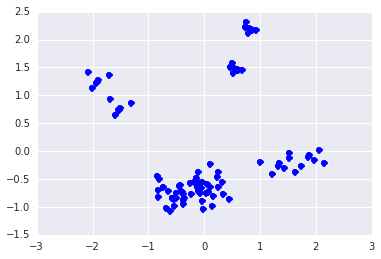

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]

X1, y1 = datasets.make_blobs(n_samples=50, centers=centers, n_features=2,
                          center_box=(-40.0, 40.0),random_state=0,  cluster_std=2)
X2, y2 = datasets.make_blobs(n_samples=20, centers=3, n_features=2,
                          center_box=(-60.0, 60.0),random_state=0)

X3, y3 = datasets.make_blobs(n_samples=20, centers=3, n_features=2,
                          center_box=(-80.0, 80.0),random_state=0)


X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1,y2,y3))

X = StandardScaler().fit_transform(X)

print X.shape, y.shape, type(y)

plt.plot(X[:,0],X[:,1],'bo')


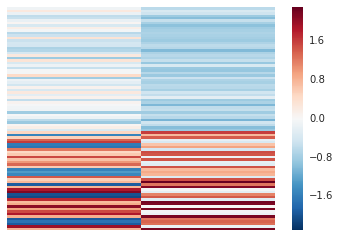

In [3]:
sns.heatmap(X,xticklabels=False, yticklabels=False, linewidths=0)

### Computing all pairwise distances using pdist

The documentation for pdist can be found here: 


http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

Note that pdist can compute an amplitude of distances and it returns  a condensed distance matrix Y. For each i and j (where i<j<n), the metric dist(u=X[i], v=X[j]) is computed and stored in entry ij.



In [4]:
distanceMatrix = pdist(X,'euclidean')

### Hierarchical clustering

For the rest of the discussion we will focus on the hierarchical clustering routines from scipy:


http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage


Note that hierarchical clustering algorithms are also implemented in sklearn: 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html  We will use them in the next lecture.


At each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster u with the remaining clusters in the forest.

Suppose there are |u| original observations u[0], \ldots, u[|u|-1] in cluster u and |v| original objects v[0], \ldots, v[|v|-1] in cluster v. Recall s and t are combined to form cluster u. Let v be any remaining cluster in the forest that is not u.

The following are methods for calculating the distance between the newly formed cluster u and each v.


method=’single’ assigns
$$d(u,v) = \min(dist(u[i],v[j]))$$
for all points i in cluster u and j in cluster v. This is also known as the Nearest Point Algorithm.


method=’complete’ assigns
        $$d(u, v) = \max(dist(u[i],v[j]))$$
for all points i in cluster u and j in cluster v. This is also known by the Farthest Point Algorithm or Voor Hees Algorithm.


method=’average’ assigns
        $$d(u,v) = \sum_{ij} \frac{d(u[i], v[j])} {(|u|*|v|)}$$
for all points i and j where $|u|$ and $|v|$ are the cardinalities of clusters u and v, respectively. This is also called the UPGMA algorithm. This is called UPGMA.


method=’weighted’ assigns
$$d(u,v) = (dist(s,v) + dist(t,v))/2$$
where cluster u was formed with cluster s and t and v is a remaining cluster in the forest. (also called WPGMA)


method=’centroid’ assigns
        $$dist(s,t) = ||c_s-c_t||_2$$
where $c_s$ and $c_t$ are the centroids of clusters s and t, respectively. When two clusters s and t are combined into a new cluster u, the new centroid is computed over all the original objects in clusters s and t. The distance then becomes the Euclidean distance between the centroid of u and the centroid of a remaining cluster v in the forest. This is also known as the UPGMC algorithm.


method=’median’ assigns $d(s,t)$ like the centroid method. When two clusters s and t are combined into a new cluster u, the average of centroids s and t give the new centroid u. This is also known as the WPGMC algorithm.


method=’ward’ uses the Ward variance minimization algorithm. The new entry $d(u,v)$ is computed as follows,
        $$d(u,v) = \sqrt{\frac{|v|+|s|} {T}d(v,s)^2 + \frac{|v|+|t|} {T}d(v,t)^2 + \frac{|v|} {T}d(s,t)^2}$$
 where u is the newly joined cluster consisting of clusters s and t, v is an unused cluster in the forest, T=|v|+|s|+|t|. This is also known as the incremental algorithm.



In [5]:
Z = hr.linkage(X, method='complete', metric='euclidean')

print Z.shape, X.shape

(89, 4) (90, 2)


Hierarchical clustering returns a 4 by (n-1) matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


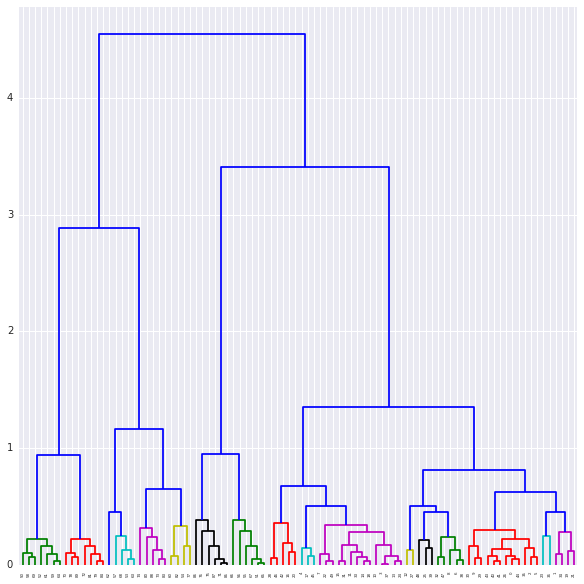

In [6]:
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4)
fig.show()

In [7]:
ck = hr.fcluster(hr.linkage(distanceMatrix, method='complete'), 1.5,'distance')
print ck

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 2 2 3 3 2 1 1 2 1 2 2 1 3 3 3 2 1 1 3 1 2
 2 3 3 2 1 1 2 1 2 2 1 3 3 3 2 1]


An alternative way of visualizing the clustering using seaborn

[27, 12, 19, 36, 1, 21, 34, 8, 48, 25, 39, 9, 29, 44, 2, 5, 43, 40, 41, 0, 26, 23, 6, 38, 32, 47, 28, 46, 17, 45, 16, 20, 42, 11, 13, 24, 10, 4, 3, 37, 30, 35, 7, 22, 49, 15, 31, 14, 18, 33, 57, 62, 68, 53, 63, 77, 54, 60, 82, 52, 50, 59, 61, 58, 64, 69, 74, 80, 88, 73, 83, 72, 70, 79, 81, 78, 84, 89, 76, 86, 75, 87, 71, 85, 56, 66, 55, 67, 51, 65]


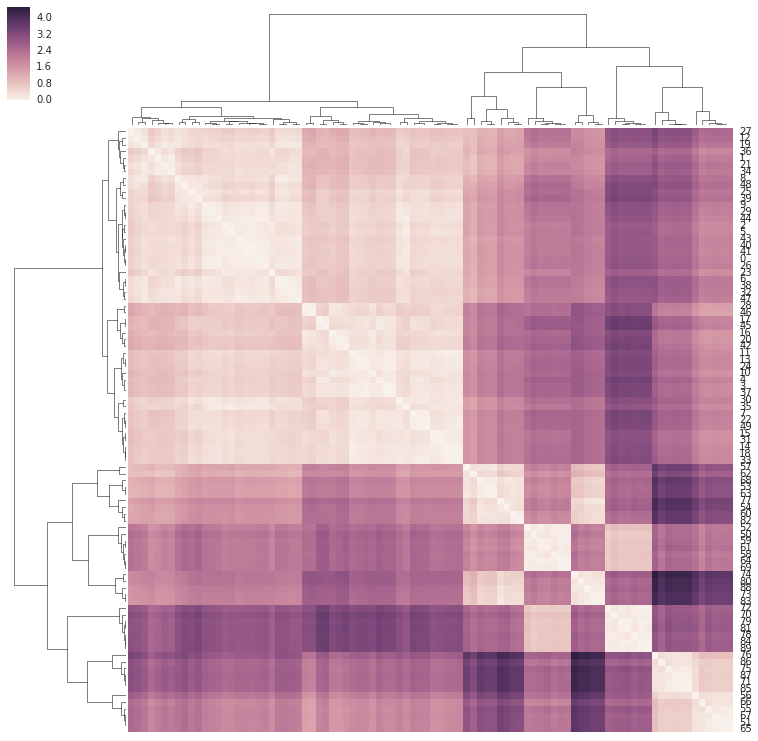

In [8]:
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print cg.dendrogram_col.reordered_ind


## Density-based clustering

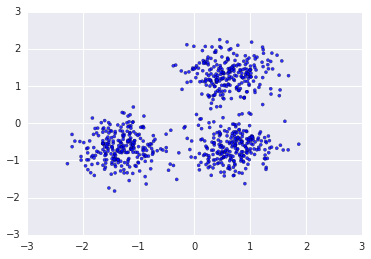

In [9]:
##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)

In [10]:
dbscan = cluster.DBSCAN(eps=0.2)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

[-1  4 -1  4  4  0  1  2  2  2  3  4  2  2  4  2  2  2  2  2  5  2  4  2 10
  4  2  2  9  2  4  4  3  2 -1  4  4  4  5  2  4  4 11  5  2  2  2  6 -1  4
  2  0  2  2  2  7  4 10  5  2  4  2  4  2  8  0  4  4 -1  4  4  1  2  2  6
  7  4  7  4  2 -1  4  5  5  4  7  5  3  4  0  2  2  2  2 -1  2  2 -1 -1  2
  1 -1  5  5  9  3  2  2  4  6 10  5  2  4  2  6  2  2  4  2  6 -1 -1  2  4
  2  4  4  2  5  4  2  4  4  2  4  5  2  2  4  5  2  5  2  3 10  2  4  2 -1
  4  9  2 -1  4  2  2  2  1  8 -1 -1  2  3 10  4  2  7 -1  4  8  4  7 -1  7
  2 11  3  7  2  5  2  7  4  2 11  7  7  4  5  2  4  2  7  2  2  4  3  3  4
  2  4  2  4  2 -1  4  4 -1  4  2  4  2 -1  2  7  4  5  4  7 -1  4  4  4  5
  4  2 10  4  4  2  2  2  2  5  2  2  2  1  4  1 10  2  7  4  4  8  6  2  5
  2  5  0  2  4  2  5  2  8  2  9  2  2  2  8  2  4  2  4  4  2  2  5  5  6
  4  2  2  8  7  2  4  2  8  7  4  5  4  2  5  5  7  7  5  5  4  4  8  2  4
  2  4  2  6  4  2  4 -1  3  8  0  9  2  4  7  7  2  2 -1  2  2  2  2  2  2
  4  2  4  2

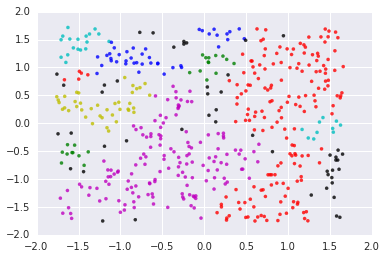

In [19]:
print y_pred
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10, alpha=0.8)

## Comparing the different clustering algorithms

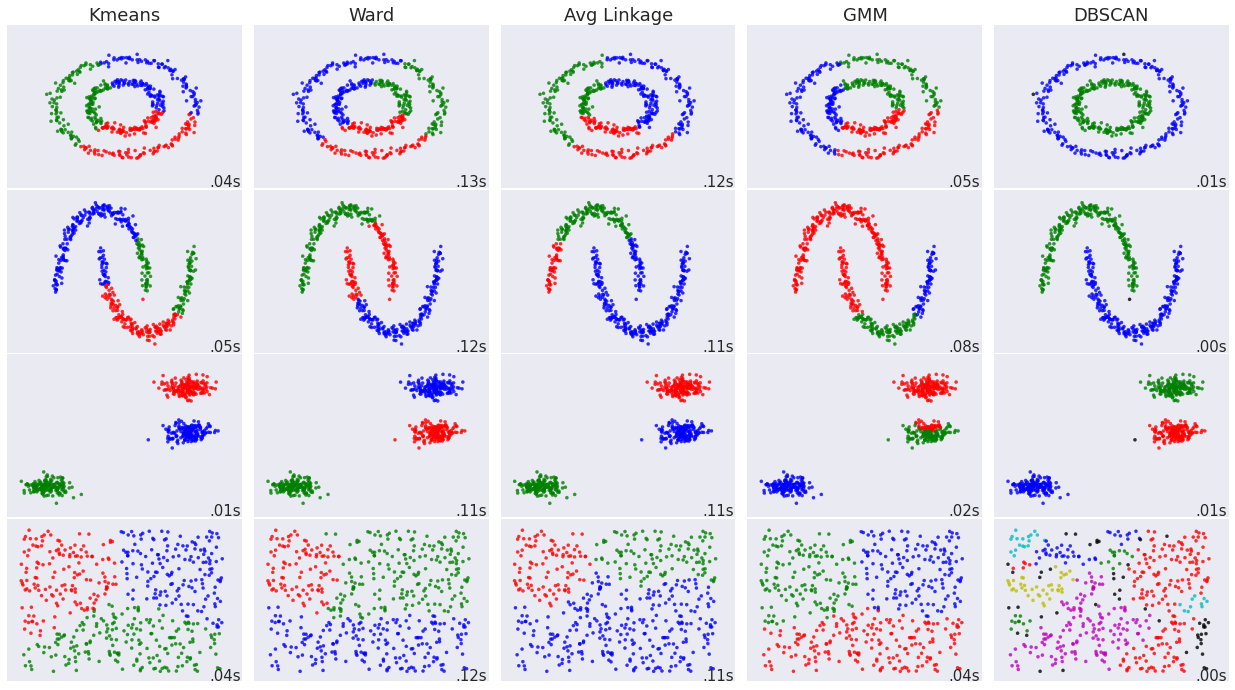

In [18]:
from sklearn import mixture


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 500
circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None



colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(17, 9.5))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([circles, moons, blobs,
                                     no_structure]):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    # Compute distances
    #distances = np.exp(-euclidean_distances(X))
    distances = metrics.euclidean_distances(X)

    # create clustering estimators
    kmeans = cluster.KMeans(n_clusters=3)
    ward = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
    dbscan = cluster.DBSCAN(eps=0.2)
    average_linkage = cluster.AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=3)
    gmm = mixture.GMM(n_components=3, covariance_type='diag')

    for name, algorithm in [
                            ('Kmeans', kmeans),
                            ('Ward', ward),
                            ('Avg Linkage', average_linkage),
                            ('GMM', gmm),
                            ('DBSCAN', dbscan)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, 5, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10, alpha=0.8)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            #plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        #plt.xlim(-2, 2)
        #plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()